# CSCI262 Assignment 02

**Due:** 2018.09.24 **| Author:** Dinh Che **| Student ID:** 5721970 **| Email:** dbac496@uowmail.edu.au  

### Question 1.

* Expected number of hashes:
    * $h =\sim 2^{k-1}$
* Cost of completing $P$:
    * $\sim m \cdot 2^{k-1}$

          0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15
# Hashes   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
Case 2     0   0   0   1   4  10  20  31  40  44  40  31  20  10   4   1


<Figure size 432x288 with 0 Axes>

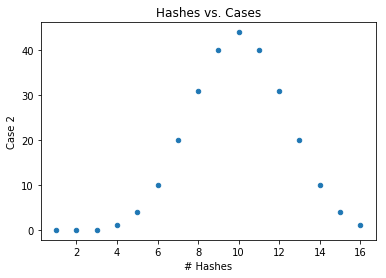

<Figure size 432x288 with 0 Axes>

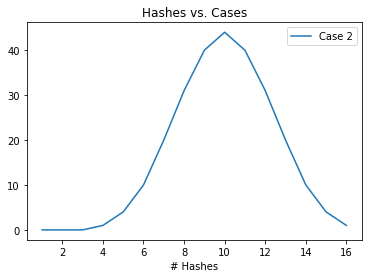

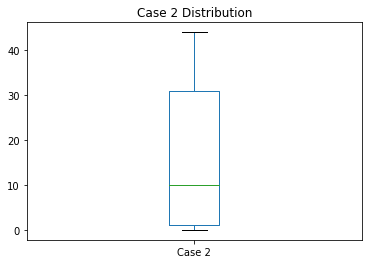

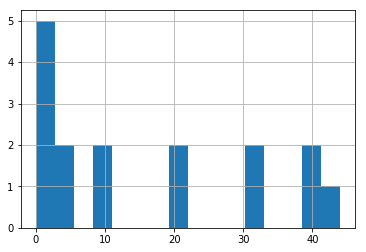

count    16.000000
mean     16.000000
std      16.321765
min       0.000000
25%       1.000000
50%      10.000000
75%      31.000000
max      44.000000
Name: Case 2, dtype: float64
median: 10.0


In [25]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats


def cost(m, k):
    cases = m * np.power(2, k - 1)
    return cases


case_2 = [
    ('# Hashes', [x for x in range(1, 17)]),
    ('Case 2', [0, 0, 0, 1, 4, 10, 20, 31, 40, 44, 40, 31, 20, 10, 4, 1])
]

df_2 = pd.DataFrame.from_dict(dict(case_2))

data = [
    ('Case 1', [1] * 16),
    ('Case 2', [0, 0, 0, 1, 4, 10, 20, 31, 40, 44, 40, 31, 20, 10, 4, 1]),
    ('Case 3', [cost(x, 6) for x in range(1, 17)])
]

df_1 = pd.DataFrame.from_dict(dict(data))

print(df_2.T)

# plt.title('Distribution of k Sub-puzzles')

# df_1.plot.hist(title='Distribution of k sub-puzzles', bins=16, color=('red', 'blue', 'orange', 'green'), 
# edgecolor='black') 

# case = df_1['Case 2']
# density = stats.gaussian_kde(case)
# n, x, _ = plt.hist(case, color='lightgrey', normed=True, bins=16)  
# plt.plot(x, density(x))

plt.figure()
df_2.plot(kind='scatter', title='Hashes vs. Cases', x='# Hashes', y='Case 2')

plt.figure()
df_2.plot(kind='line', title='Hashes vs. Cases', x='# Hashes', y='Case 2')

plt.figure()
df_2['Case 2'].plot(kind='box', title='Case 2 Distribution')
plt.figure()
df_2['Case 2'].hist(bins=16)

plt.show()
print(df_2['Case 2'].describe())
print('median: ' + str(df_2['Case 2'].median()))

# plt.plot(df_1['Case 3'], df_1['# Hashes'] )


### Question 2.

* Original

```pseudocode
permit = CheckAccess()

IF (permit == Access_Denied)
    Print "Access Denied"
ELSE 
    Print "Access Granted"
    Run Function()
```

* "Default deny, not default allow!

```pseudocode
permit = CheckAccess()
IF (permit == Access_Granted)
    Print "Access Granted"
    Run Function()
ELSE
    Print "Access Denied"
```

### Question 3.   
<br>

<font color=blue>
    Consider that the <em>incidence</em> of viral attachments in email messages is <b>1 in 800</b>. Your malware checker will correctly identify a message as <em>viral</em> <b>95%</b> of the time. Your malware checker will correctly identify a message <em>non-viral</em> <b>95%</b> of the time. Your malware checker has just flagged a message as being <em>malware</em>. What is the probability that the message is <b>actually okay</b>? Justify your answer using <b>Bayes theorem</b>
</font>

$$
\begin{align*}
& P
\end{align*}
$$

### Question 4.  
<br>

<font color=blue>
    Describe, in your own words, a <b>specific instance of an insider placing malware within a system.</b> You should describe the <b>type of malware placed</b>, <b>the expected likely impact</b>, and <b>some details regarding the outcome</b>. This is not meaning a hypothetical scenario you have made up, find an actual real world example.
</font>


### Question 5.  
<br>

<font color=blue>
    In the context of <b>phishing</b>, list <b>8 points</b> that can be used in <b>checking the legitimacy of an email</b>. <b>Justify</b> why each is appropriate as an <b>indicator</b>. Note that some points could relate to characteristics of legitimate messages, and others could be indicators of a phishing message.
</font>

### Question 6.  


In [28]:
import random
from enum import Enum
from IPython.display import display, HTML
import numpy as np
import pandas as pd


class State(Enum):
    UN_INF = 0
    X_INF = 1
    W_INF = 2


time = 0

n_C = 0  # number of computers
n_X = 0  # number of X infected computers
n_W = 0  # number of W infected computers

# Get the number of computers
n_C = 10

computers = {x: State.UN_INF for x in range(1, n_C + 1)}

random.seed(2)
uninfected_sample = random.sample(list(computers.keys()), n_C)  # set up a random sample with no duplicates

choice = random.choice(uninfected_sample)  # select one to be infected at the beginning
computers[uninfected_sample.pop()] = State.X_INF

# Set pandas display options to fit width
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

for i in np.arange(0, 24.5, 0.5):
    time = i
    n_X = 0

    # if i is 6.5:  # a counter worm, W has been developed and is deployed on one infected computer
    #     pass

    # every hour the worm X spreads from each infected computer to one previously uninfected computer.
    if i % 1 == 0:
        infected = [val for _, val in computers.items() if val == State.X_INF]
        n_X = len(infected)

        if uninfected_sample is None:
            continue
        elif n_X < len(uninfected_sample):
            for j in range(n_X):
                computers[uninfected_sample.pop()] = State.X_INF
        else:
            for k in range(len(uninfected_sample)):
                computers[uninfected_sample.pop()] = State.X_INF

        random.shuffle(uninfected_sample)

        # computers_df = {'computer': [x for x in computers.keys()],
        #                 'state': [y for y in computers.values()]}
        df = pd.DataFrame(computers, index=['State', ])
        print("Time: " + str(time) + " ==> [ X Infected:  " + str(n_X) + " ] \n")
        display(df)



Time: 0.0 ==> [ X Infected:  1 ] 



,1,2,3,4,5,6,7,8,9,10
State,State.UN_INF,State.UN_INF,State.UN_INF,State.UN_INF,State.UN_INF,State.X_INF,State.UN_INF,State.UN_INF,State.UN_INF,State.X_INF


Time: 1.0 ==> [ X Infected:  2 ] 



,1,2,3,4,5,6,7,8,9,10
State,State.UN_INF,State.UN_INF,State.X_INF,State.UN_INF,State.UN_INF,State.X_INF,State.UN_INF,State.UN_INF,State.X_INF,State.X_INF


Time: 2.0 ==> [ X Infected:  4 ] 



,1,2,3,4,5,6,7,8,9,10
State,State.X_INF,State.UN_INF,State.X_INF,State.X_INF,State.X_INF,State.X_INF,State.UN_INF,State.X_INF,State.X_INF,State.X_INF


Time: 3.0 ==> [ X Infected:  8 ] 



,1,2,3,4,5,6,7,8,9,10
State,State.X_INF,State.X_INF,State.X_INF,State.X_INF,State.X_INF,State.X_INF,State.X_INF,State.X_INF,State.X_INF,State.X_INF


### Question 7. 
<br>

<font color=blue>
    Briefly describe, in your own words, each of the following. Be sure to specify the domain and nature of each. 
</font><br>
<font color=blue>&nbsp;&nbsp;&nbsp;&nbsp;a) <b>an XML bomb.</b><br></font>
<font color=blue>&nbsp;&nbsp;&nbsp;&nbsp;b) <b>BlueSmack.</b><br></font>
<font color=blue>&nbsp;&nbsp;&nbsp;&nbsp;c) <b>Mydoom.</b><br></font>
<font color=blue>&nbsp;&nbsp;&nbsp;&nbsp;d) <b>Torpig.</b><br></font>

### Question 8.  
<br>

<font color=blue>
    Explain what BHO's are and how they have been used maliciously.
</font>
